# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules
#Import all the necessary modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#Import all the necessary modules
import pandas as pandas
import numpy as numpy
import os
import matplotlib.pyplot as matplot
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools
from IPython.display import Image  
from os import system
numpy.random.seed(1234)
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


In [2]:
def plot_confusion_matrix(Y_test,Y_predict, target_names,title='Confusion matrix',cmap=None,normalize=True):
    cm = metrics.confusion_matrix(Y_test, Y_predict)
    accuracy = numpy.trace(cm) / float(numpy.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = matplot.get_cmap('Blues')

    matplot.figure(figsize=(8, 6))
    matplot.imshow(cm, interpolation='nearest', cmap=cmap)
    matplot.title(title)
    matplot.colorbar()

    if target_names is not None:
        tick_marks = numpy.arange(len(target_names))
        matplot.xticks(tick_marks, target_names, rotation=45)
        matplot.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            matplot.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            matplot.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    matplot.tight_layout()
    matplot.ylabel('True label')
    matplot.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    matplot.show()
    print(metrics.classification_report(Y_test, Y_predict))
    model_performance = [metrics.accuracy_score(Y_test, Y_predict),metrics.recall_score(Y_test, Y_predict),
                         metrics.precision_score(Y_test, Y_predict),metrics.f1_score(Y_test, Y_predict) ]
    accuracy_report = pandas.DataFrame(model_performance, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
    return accuracy_report
    
def EDA_Corr(df):
    corr = df.corr()
    index = corr.columns
    Output = []
    for i in range(0,len(index)):
        i = index[i]
        Pos = corr.index[(corr[i] >= 0.5)].tolist()
        No = corr.index[(corr[i] < 0.5) & (corr[i] > -0.6)].tolist()
        Neg = corr.index[(corr[i] <= -0.5)].tolist()
        leng_u = len(No)
        leng_pos = len(Pos)
        leng_neg = len(Neg)
        Out = [i, leng_u, leng_pos, leng_neg, Pos, Neg, No]
        Output.append(Out)
    fig, ax = matplot.subplots(figsize=(20,10))  
    sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='Blues', linewidths=0, ax = ax)
    Output1 = pandas.DataFrame(Output, columns= ['Feature','Uniqueness','Positive rel', 'inverse rel', 'Pos', 'Neg', 'No'])
    return Output1

def EDA(df):
    EDA = pandas.DataFrame((df.describe()).T)
    EDA["Kurtosis"] = df.kurtosis()
    EDA["Skewness"] = df.skew()
    EDA["Range"] = EDA['max'] -  EDA['min']
    EDA["IQR"] = EDA['75%'] -  EDA['25%']
    return EDA

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [3]:
os.chdir("C:\\Siddhartha\\Personal Documents\\BOK\\AIML\\Un Supervised Learning\\Clustering")
Source = pandas.read_csv("mpg.csv")

In [4]:
Source.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
Source.shape

(398, 9)

In [7]:
 (Source.iloc[:0:7])[~(Source.iloc[:0:7]).applymap(numpy.isreal).all(1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [8]:
Source["cylinders"] = pandas.Categorical(Source["cylinders"])
Source["origin"] = pandas.Categorical(Source["origin"])

In [9]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null category
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null category
car name        398 non-null object
dtypes: category(2), float64(3), int64(2), object(2)
memory usage: 22.9+ KB


In [10]:
Source['horsepower'] = Source['horsepower'].replace('?',0)
Source['horsepower'] = Source['horsepower'].replace('?',Source['horsepower'].median())

In [11]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null category
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null category
car name        398 non-null object
dtypes: category(2), float64(3), int64(2), object(2)
memory usage: 22.9+ KB


In [12]:
Source['horsepower'] = pandas.to_numeric(Source['horsepower'])

In [13]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null category
displacement    398 non-null float64
horsepower      398 non-null int64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null category
car name        398 non-null object
dtypes: category(2), float64(3), int64(3), object(1)
memory usage: 22.9+ KB


In [14]:
EDA = EDA(Source)
EDA

,count,mean,std,min,25%,50%,75%,max,Kurtosis,Skewness,Range,IQR
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6,-0.510781,0.457066,37.6,11.50
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0,-0.746597,0.719645,387.0,157.75
horsepower,398.0,102.894472,40.269544,0.0,75.000,92.0,125.000,230.0,0.844941,0.787889,230.0,50.00
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0,-0.785529,0.531063,3527.0,1384.25
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8,0.419497,0.278777,16.8,3.35
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0,-1.181232,0.011535,12.0,6.00


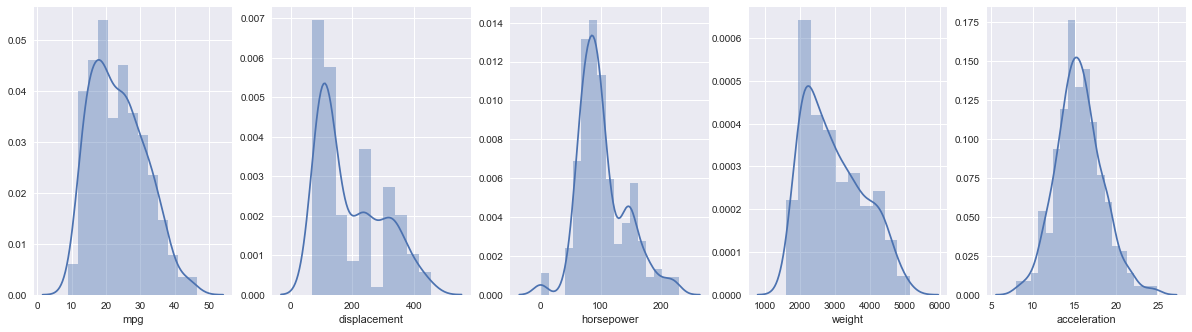

In [15]:
f, axes = matplot.subplots(1, 5, figsize=(8, 8))
sns.distplot(Source['mpg'], ax = axes[0])
sns.distplot(Source['displacement'], ax = axes[1])
sns.distplot(Source['horsepower'], ax = axes[2])
sns.distplot(Source['weight'], ax = axes[3])
sns.distplot(Source['acceleration'], ax = axes[4])
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

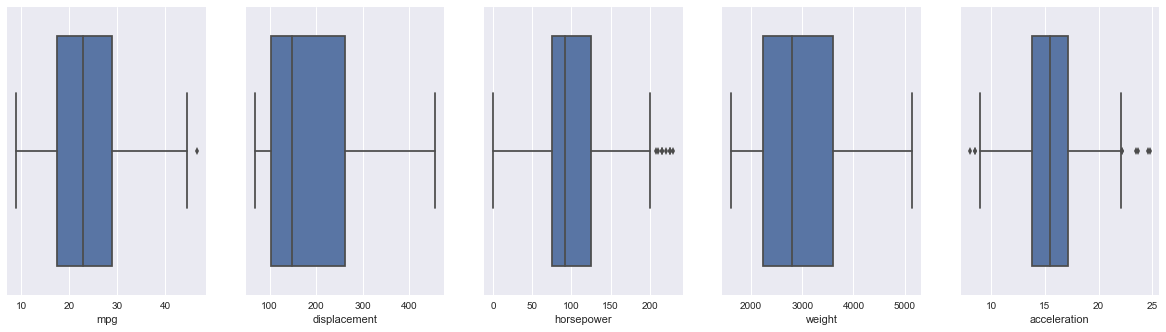

In [16]:
f, axes = matplot.subplots(1, 5, figsize=(8, 8))
sns.boxplot(Source['mpg'], ax = axes[0])
sns.boxplot(Source['displacement'], ax = axes[1])
sns.boxplot(Source['horsepower'], ax = axes[2])
sns.boxplot(Source['weight'], ax = axes[3])
sns.boxplot(Source['acceleration'], ax = axes[4])
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

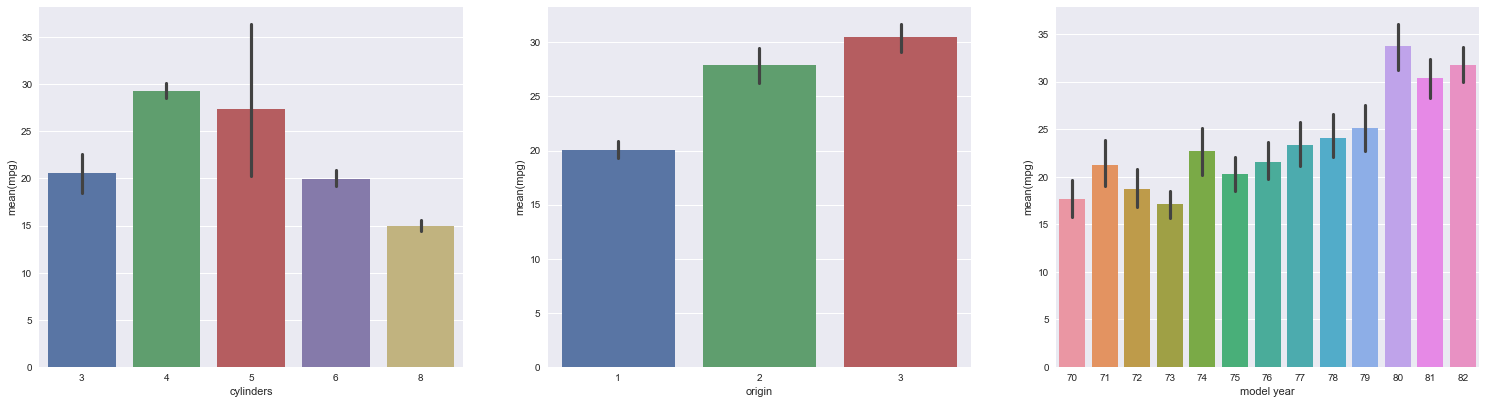

In [17]:
f, axes = matplot.subplots(1, 3, figsize=(10, 10))
sns.barplot(x = 'cylinders', y = 'mpg', data = Source, ax = axes[0])
sns.barplot(x = 'origin', y = 'mpg', data = Source, ax = axes[1])
sns.barplot(x = 'model year', y = 'mpg', data = Source, ax = axes[2])
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

In [18]:
Source['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [19]:
Source['model year'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model year, dtype: int64

In [20]:
Source['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [21]:
Source['car name'].value_counts()

ford pinto                           6
amc matador                          5
ford maverick                        5
toyota corolla                       5
amc hornet                           4
amc gremlin                          4
chevrolet impala                     4
peugeot 504                          4
toyota corona                        4
chevrolet chevette                   4
ford gran torino                     3
ford galaxie 500                     3
plymouth duster                      3
chevrolet caprice classic            3
pontiac catalina                     3
chevrolet vega                       3
plymouth fury iii                    3
chevrolet citation                   3
dodge colt                           3
volkswagen dasher                    3
chevrolet nova                       3
honda civic                          3
amc concord                          2
subaru                               2
opel manta                           2
chevrolet monte carlo lan

# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

Missing value treated already in the previous step

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

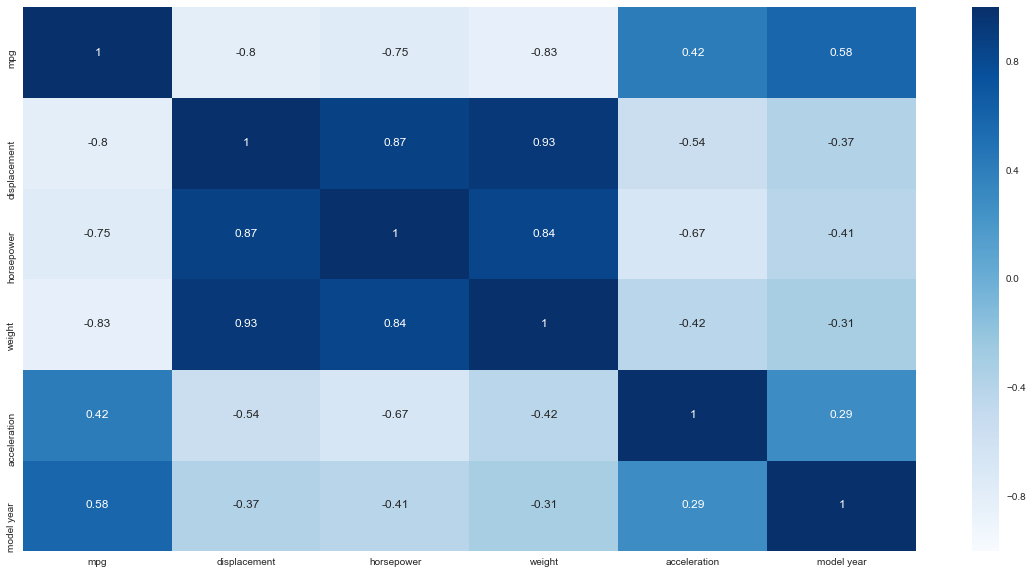

In [22]:
EDA_Corr_Results = pandas.DataFrame(EDA_Corr(Source))

In [23]:
(EDA_Corr_Results.sort_values("Uniqueness", ascending= False)).head()

,Feature,Uniqueness,Positive rel,inverse rel,Pos,Neg,No
4,acceleration,4,1,2,[acceleration],"[displacement, horsepower]","[mpg, displacement, weight, model year]"
5,model year,4,2,0,"[mpg, model year]",[],"[displacement, horsepower, weight, acceleration]"
1,displacement,2,3,2,"[displacement, horsepower, weight]","[mpg, acceleration]","[acceleration, model year]"
3,weight,2,3,1,"[displacement, horsepower, weight]",[mpg],"[acceleration, model year]"
0,mpg,1,2,3,"[mpg, model year]","[displacement, horsepower, weight]",[acceleration]


In [24]:
(EDA_Corr_Results.sort_values("Positive rel", ascending= False)).head()

,Feature,Uniqueness,Positive rel,inverse rel,Pos,Neg,No
1,displacement,2,3,2,"[displacement, horsepower, weight]","[mpg, acceleration]","[acceleration, model year]"
2,horsepower,1,3,2,"[displacement, horsepower, weight]","[mpg, acceleration]",[model year]
3,weight,2,3,1,"[displacement, horsepower, weight]",[mpg],"[acceleration, model year]"
0,mpg,1,2,3,"[mpg, model year]","[displacement, horsepower, weight]",[acceleration]
5,model year,4,2,0,"[mpg, model year]",[],"[displacement, horsepower, weight, acceleration]"


In [25]:
(EDA_Corr_Results.sort_values("Neg", ascending= False)).head()

,Feature,Uniqueness,Positive rel,inverse rel,Pos,Neg,No
1,displacement,2,3,2,"[displacement, horsepower, weight]","[mpg, acceleration]","[acceleration, model year]"
2,horsepower,1,3,2,"[displacement, horsepower, weight]","[mpg, acceleration]",[model year]
3,weight,2,3,1,"[displacement, horsepower, weight]",[mpg],"[acceleration, model year]"
0,mpg,1,2,3,"[mpg, model year]","[displacement, horsepower, weight]",[acceleration]
4,acceleration,4,1,2,[acceleration],"[displacement, horsepower]","[mpg, displacement, weight, model year]"


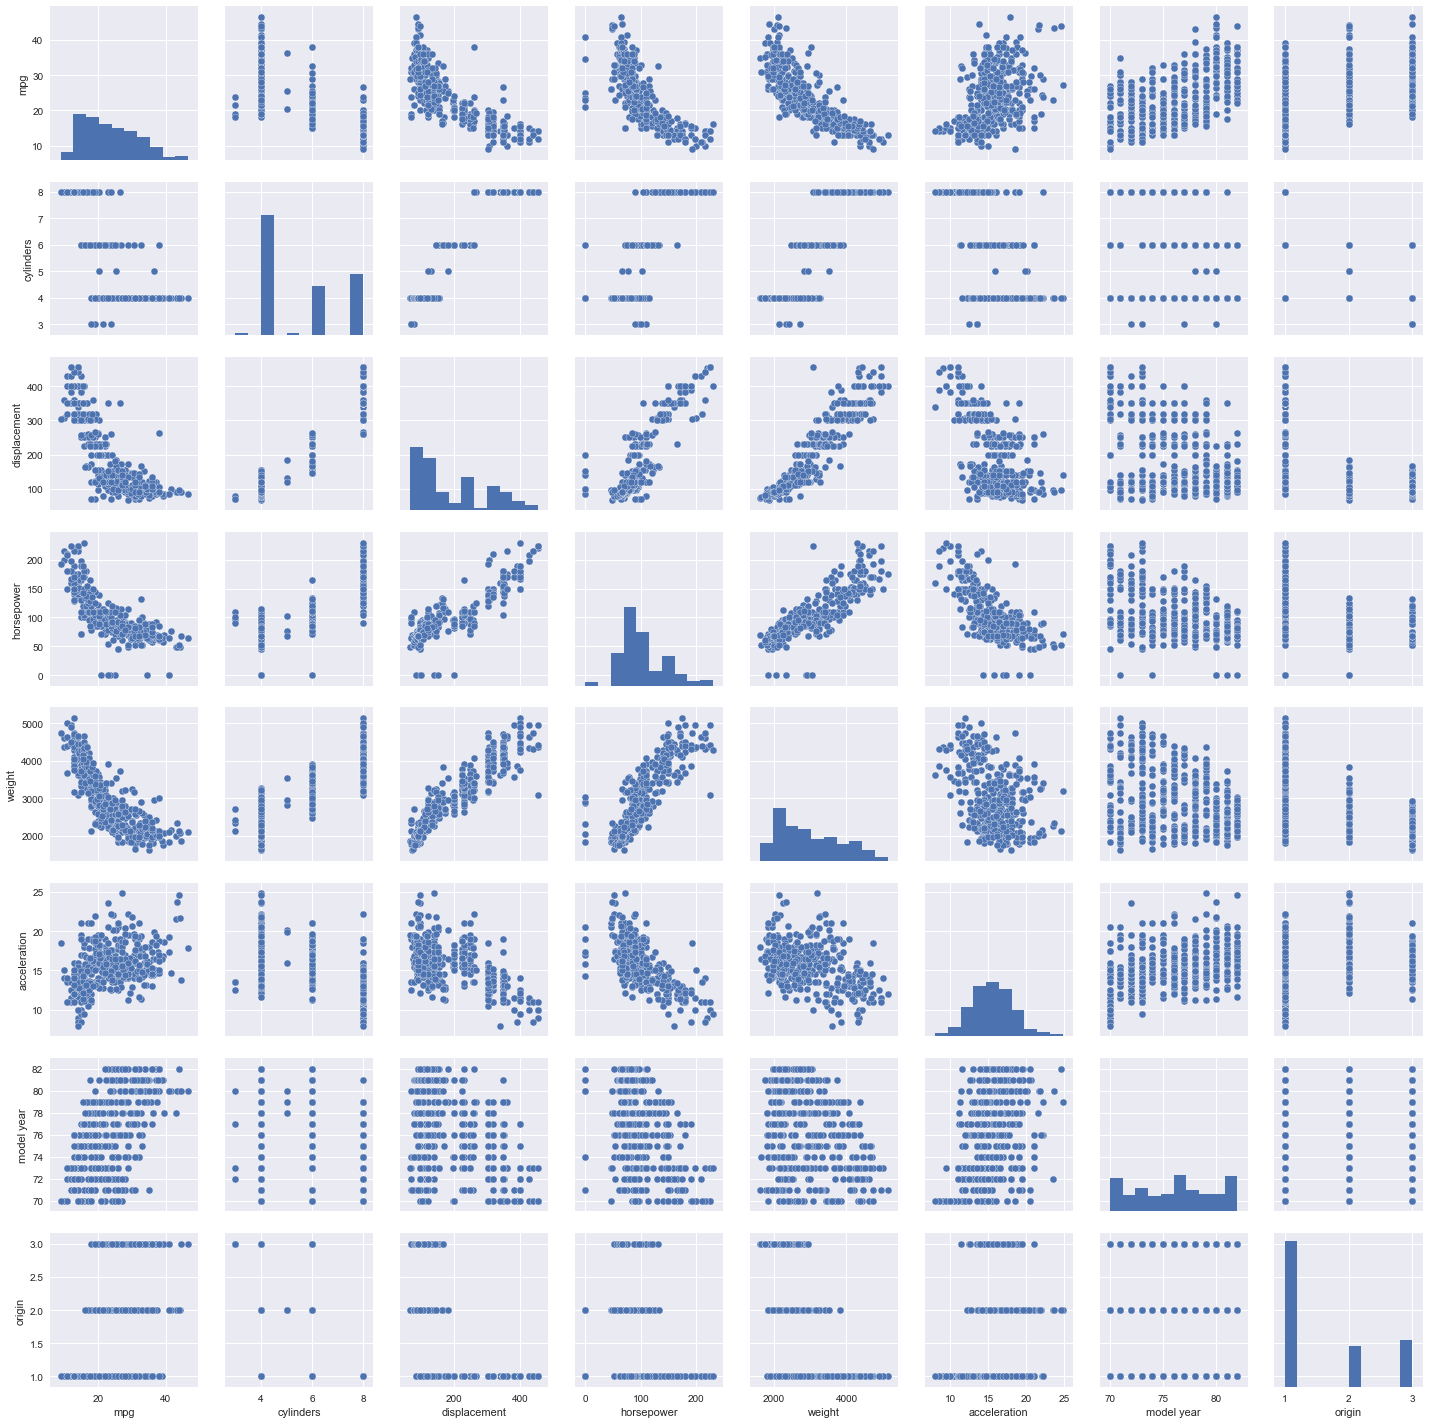

In [26]:
sns.pairplot(Source)

In [27]:
#Observations


# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [28]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age

In [29]:
Source['Age_of_Car'] = 83 - Source['model year']

In [30]:
Source.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Age_of_Car
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,13
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,13
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,13
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,13
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,13


In [31]:
Dummies = pandas.get_dummies(Source['origin'],drop_first=True)

In [32]:
Source = Source.join(Dummies)

In [33]:
Source

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Age_of_Car,2,3
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,13,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,13,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,13,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,13,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,13,0,0
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,13,0,0
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,13,0,0
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,13,0,0
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,13,0,0
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,13,0,0


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [34]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now

In [35]:
Source.columns

Index([         'mpg',    'cylinders', 'displacement',   'horsepower',
             'weight', 'acceleration',   'model year',       'origin',
           'car name',   'Age_of_Car',              2,              3],
      dtype='object')

In [36]:
Subset = Source[['mpg',  'displacement',   'horsepower',
             'weight', 'acceleration']]

Subset_Columns = ['mpg', 'displacement',   'horsepower',
             'weight', 'acceleration']

a = Subset > Subset.quantile(0.75) + ((1.5 * EDA['IQR'])[0:5])
b = Subset < Subset.quantile(0.25) - ((1.5 * EDA['IQR'])[0:5])
Source[["Q31","Q32","Q33","Q34","Q35"]] = a
Source[["Q11","Q12","Q13","Q14","Q15"]] = b

columns = ['Q31', 'Q32', 'Q33', 'Q34', 'Q35']

Q1 =  ['Q11','Q12', 'Q13', 'Q14', 'Q15']

Q3 =  ['Q31', 'Q32', 'Q33', 'Q34', 'Q35']

In [37]:
Q1_Outliers = []
Q1_j = []
Q3_Outliers = []
Q3_j = []
for i in range(0,len(Q1)):
    i = Q1[i]
    No = Source.shape[0] - Source[i].value_counts()[0]
    Q1_Outliers.append(No)
    Q1_j.append(i)
Q1_Col = pandas.DataFrame(Q1_j, columns=["Q1"])
Q1_outliers = pandas.DataFrame(Q1_Outliers, columns=["Q1 Outliers"])
Outliers_impact_Q1 = Q1_Col.join(Q1_outliers)

for i in range(0,len(Q3)):
    i = Q3[i]
    No = Source.shape[0] - Source[i].value_counts()[0]
    Q3_Outliers.append(No)
    Q3_j.append(i)
Q3_Col = pandas.DataFrame(Q3_j, columns=["Q3"])
Q3_outliers = pandas.DataFrame(Q3_Outliers, columns=["Q3 Outliers"])
Outliers_impact_Q3 = Q3_Col.join(Q3_outliers)

Outliers_impact = Outliers_impact_Q1['Q1 Outliers']+Outliers_impact_Q3['Q3 Outliers']
Outliers_impact = (pandas.DataFrame(Subset_Columns, columns=["Column Name"])).join(pandas.DataFrame(Outliers_impact, columns=["No of Outliers"]))

In [38]:
Outliers_impact

,Column Name,No of Outliers
0,mpg,1
1,displacement,0
2,horsepower,10
3,weight,0
4,acceleration,9


In [39]:
Q3

['Q31', 'Q32', 'Q33', 'Q34', 'Q35']

In [40]:
aij = []
for i in range(0,5):
    i = Q3[i]
    bij = ((pandas.DataFrame(Source[i])).index[(Source[i] == True)].tolist())
    aij = aij + bij
Q3_indices = (pandas.Series(aij)).value_counts()


cij = []
for i in range(0,5):
    i = Q1[i]
    dij = ((pandas.DataFrame(Source[i])).index[(Source[i] == True)].tolist())
    cij = cij + dij
Q1_indices = (pandas.Series(cij)).value_counts()

In [41]:
Q3_indices

95     1
299    1
67     1
195    1
6      1
7      1
8      1
394    1
300    1
94     1
13     1
116    1
326    1
25     1
59     1
27     1
322    1
dtype: int64

In [42]:
Q1_indices

7     1
9     1
11    1
dtype: int64

In [43]:
Q3_values = Subset.quantile(0.75) + (1.5 * EDA['IQR'])
Q1_values = Subset.quantile(0.25) - (1.5 * EDA['IQR'])
Outliers_Q3_Q1 = pandas.DataFrame(Q3_values, columns = ['Q3_values']).join(pandas.DataFrame(Q1_values, columns=['Q1_values']))
for i in range(0,len(Subset_Columns)):
    Q3 = ((Outliers_Q3_Q1).T)[Subset_Columns[i]].loc['Q3_values']
    Q1 = ((Outliers_Q3_Q1).T)[Subset_Columns[i]].loc['Q1_values']
    Source.loc[Source[Subset_Columns[i]] > Q3, Subset_Columns[i]] = numpy.nan
    Source.loc[Source[Subset_Columns[i]] < Q1, Subset_Columns[i]] = numpy.nan
    median1 = ((Source.loc[(Source[Subset_Columns[i]]<((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q3_values'])) & 
             (Source[Subset_Columns[i]]>((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q1_values']))])[Subset_Columns[i]]).median()
    Source.replace(numpy.nan,median1,inplace= True)

In [44]:
Source = Source.iloc[:,0:12]

In [45]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
mpg             398 non-null float64
cylinders       398 non-null category
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null category
car name        398 non-null object
Age_of_Car      398 non-null int64
2               398 non-null uint8
3               398 non-null uint8
dtypes: category(2), float64(5), int64(2), object(1), uint8(2)
memory usage: 26.8+ KB


In [46]:
Source.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Age_of_Car,2,3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,13,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,13,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,13,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,13,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,13,0,0


In [47]:
minmax_scale = MinMaxScaler()
Source[['mpg',  'displacement',   'horsepower','weight', 'acceleration']] = minmax_scale.fit_transform(Source[['mpg',  'displacement',   'horsepower','weight', 'acceleration']])
Source

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Age_of_Car,2,3
0,0.252809,8,0.617571,0.650,0.536150,0.229008,70,1,chevrolet chevelle malibu,13,0,0
1,0.168539,8,0.728682,0.825,0.589736,0.190840,70,1,buick skylark 320,13,0,0
2,0.252809,8,0.645995,0.750,0.516870,0.152672,70,1,plymouth satellite,13,0,0
3,0.196629,8,0.609819,0.750,0.516019,0.229008,70,1,amc rebel sst,13,0,0
4,0.224719,8,0.604651,0.700,0.520556,0.114504,70,1,ford torino,13,0,0
5,0.168539,8,0.932817,0.990,0.773462,0.076336,70,1,ford galaxie 500,13,0,0
6,0.140449,8,0.997416,0.460,0.777148,0.000000,70,1,chevrolet impala,13,0,0
7,0.140449,8,0.961240,0.460,0.765240,0.496183,70,1,plymouth fury iii,13,0,0
8,0.140449,8,1.000000,0.460,0.797278,0.076336,70,1,pontiac catalina,13,0,0
9,0.168539,8,0.832041,0.950,0.634250,0.496183,70,1,amc ambassador dpl,13,0,0


In [48]:
Source_Scaled = Source

# Q7. Create appropriate clusters with the new data set

In [49]:
Source_Scaled = Source_Scaled.drop('car name', axis=1)

In [50]:
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(Source_Scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pandas.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,cluster_errors,num_clusters
0,12478.504404,1
1,4278.619703,2
2,2687.621696,3
3,2123.262281,4
4,1758.816617,5
5,1440.369705,6
6,1209.112521,7
7,1067.212501,8
8,892.299731,9


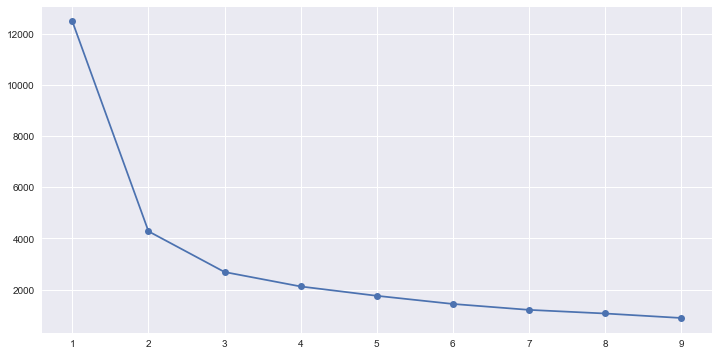

In [51]:
matplot.figure(figsize=(12,6))
matplot.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

For n_clusters = 2 The average silhouette_score is : 0.5237548790429253
For n_clusters = 3 The average silhouette_score is : 0.43964074301653433
For n_clusters = 4 The average silhouette_score is : 0.37818720489103863


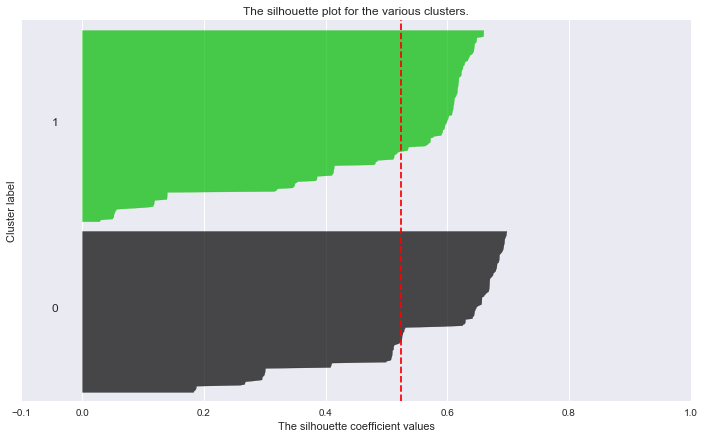

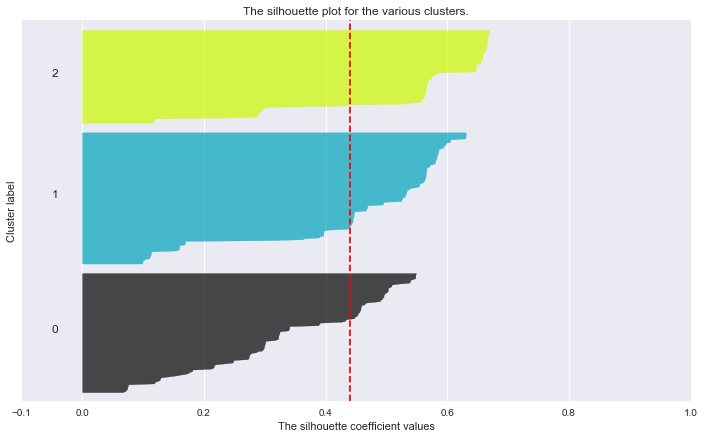

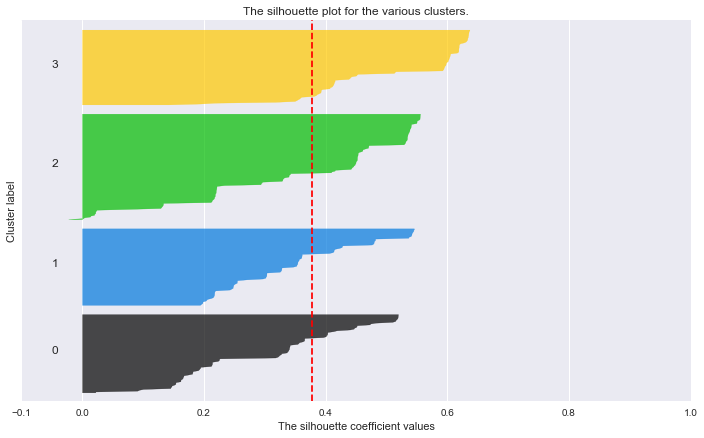

In [52]:
X = Source_Scaled
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    fig, (ax1) = matplot.subplots(1)
    fig.set_size_inches(12, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(numpy.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

matplot.show()

Both elbow chart and Silhoutte's score suggests that n_clusters = 2 may be an ideal cluster number

In [53]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(Source_Scaled)
labels = kmeans.predict(Source_Scaled)
centroids = kmeans.cluster_centers_
print("Centroid values")
print(centroids)

Centroid values
[[ 0.52887702  4.93956044  0.2364767   0.44700549  0.31449384  0.53196041
  79.48351648  1.70879121  3.51648352  0.15934066  0.27472527]
 [ 0.3025515   5.88888889  0.39792684  0.54196759  0.44416223  0.46624965
  73.08333333  1.45833333  9.91666667  0.18981481  0.13425926]]


# Q8. Identify the appropriate clusters with result from above question

Answers covered partly in the above and below questions

# Q9. Check for no of values in each cluster and centers for each variables. 

In [54]:
prediction= kmeans.predict(Source_Scaled)
Source_Scaled["clusters"] = prediction

In [55]:
Source_Scaled['clusters'].value_counts()

1    216
0    182
Name: clusters, dtype: int64

In [56]:
pandas.DataFrame(centroids)

,0,1,2,3,4,5,6,7,8,9,10
0,0.528877,4.939560,0.236477,0.447005,0.314494,0.53196,79.483516,1.708791,3.516484,0.159341,0.274725
1,0.302551,5.888889,0.397927,0.541968,0.444162,0.46625,73.083333,1.458333,9.916667,0.189815,0.134259


# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [58]:
Source_Scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Age_of_Car,2,3,clusters
0,0.252809,8,0.617571,0.650,0.536150,0.229008,70,1,13,0,0,1
1,0.168539,8,0.728682,0.825,0.589736,0.190840,70,1,13,0,0,1
2,0.252809,8,0.645995,0.750,0.516870,0.152672,70,1,13,0,0,1
3,0.196629,8,0.609819,0.750,0.516019,0.229008,70,1,13,0,0,1
4,0.224719,8,0.604651,0.700,0.520556,0.114504,70,1,13,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE5BC667F0>,
      dtype=object)

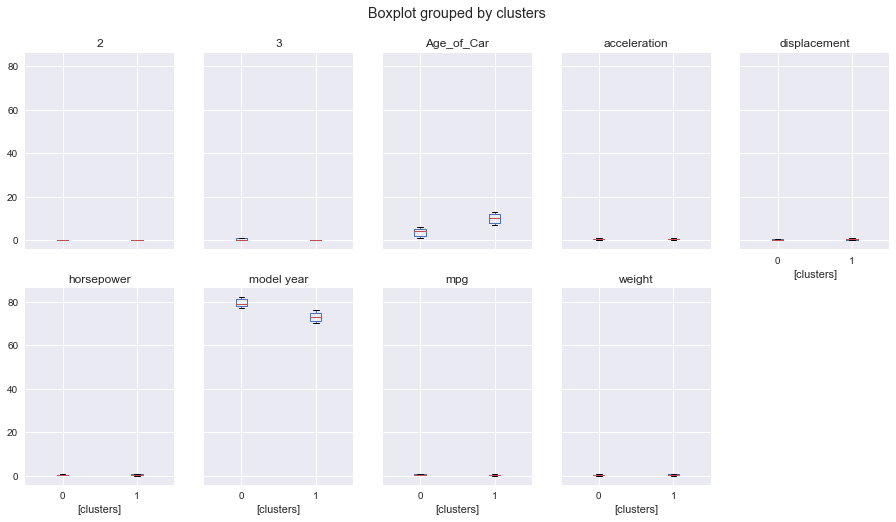

In [81]:
Source_Scaled.boxplot(by = 'clusters', figsize=(15,8), layout=(2,5), )